# üé® Draw with AI: Diffusion Models and GANs (Hands-On!)

Welcome to this interactive notebook where you'll get to create images using AI!

In this session, you'll:

‚úÖ Generate images from text prompts using **pretrained diffusion models** like *Stable Diffusion*  
‚úÖ Try out different *styles*, *settings*, and prompt crafting techniques  
‚úÖ Learn how to control and guide AI image creation like a true digital artist!

---

## üß† What are Diffusion Models?

Imagine starting with a photo, then slowly adding random noise to it ‚Äî like static on a TV ‚Äî until it's completely unrecognizable.

Now imagine trying to reverse that process: starting from pure noise and teaching the AI to *gradually remove the noise* in a smart way until an actual image appears.

That's what diffusion models do!  
They **learn to start from noise and turn it into a detailed image** step-by-step.

Diffusion models are powerful because they allow a lot of control ‚Äî you can describe what you want with text, and the model "paints" it into reality, layer by layer.

---

You don‚Äôt need to train anything from scratch. We‚Äôll download powerful pretrained models from Hugging Face and get creative using them in minutes!

Let‚Äôs get started üéØ


## üì¶ Install and Load Dependencies

To start generating images, we need to install some important libraries.

We‚Äôll use:

- ü§ó `diffusers`: for loading pretrained diffusion models like Stable Diffusion.
- üß® `transformers`: for tokenizer support when needed.
- üñºÔ∏è `accelerate`: for efficient GPU use (optional but recommended).
- üêç `torch` and `PIL`: for tensor/image handling.
- `safetensors`: to safely load models.

This will take a minute or two ‚Äî grab some coffee ‚òï


In [1]:
# üöÄ Install required libraries
!pip install -q diffusers transformers accelerate torch torchvision safetensors

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 43.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 32.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [2]:
# üìö Import core libraries
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

## üß† Load a Pretrained Diffusion Model

Now let's load a powerful pretrained diffusion model from Hugging Face ‚Äî `Stable Diffusion`.

Stable Diffusion is a text-to-image model that generates high-quality, realistic images from a simple text prompt.

We‚Äôll:

1. Load the model using `StableDiffusionPipeline`
2. Automatically use the GPU if available
3. (Optional) Login to Hugging Face if the model requires authentication

‚ö†Ô∏è Some models require you to accept license terms on Hugging Face and use a token. If needed, you‚Äôll be prompted.


In [3]:
# ü§ó (Optional) Login to Hugging Face if needed
from huggingface_hub import notebook_login

notebook_login()  # Run only if the model requires auth


## üîç How to Choose a Diffusion Model from Hugging Face

Hugging Face ü§ó hosts hundreds of pre-trained diffusion models that you can use for image generation. In this notebook, you'll be working with some of them to create your own art from text prompts!

### üß≠ Steps to Explore and Select a Model

1. **Visit the Hugging Face Models Page:**
   - Go to [https://huggingface.co/models](https://huggingface.co/models)
   - In the search bar, type keywords like:
     - `stable-diffusion`
     - `image-to-image`
     - `controlnet`
     - `dreamlike`
     - `anime`, `pixel-art`, `cyberpunk`, etc.

2. **Apply Filters:**
   - On the left panel, filter by:
     - **Task**: `Text-to-Image`
     - **Library**: `diffusers`
     - **License**: `open`, `creativeml-openrail-m`, or `mit`
     - **Hardware**: Choose models optimized for `fp16` (suitable for GPUs like T4)

3. **Look at Model Cards:**
   - Each model has a description page ("model card") that tells you:
     - What the model is good at (e.g., anime, photorealism, fantasy)
     - Whether it‚Äôs optimized for GPUs (e.g., T4, A100)
     - What resolution and speed you can expect
     - Example prompts you can try

---

### üí° Tips for T4 GPU Users (like in Colab)

T4 GPUs have **16 GB of VRAM**, which is decent, but not enough for very large or high-resolution models. So:

- ‚úÖ Choose models that:
  - Are built on **Stable Diffusion v1.4 or v1.5**
  - Use `fp16` (half-precision) to save memory
  - Have smaller resolution defaults like **512√ó512**

- ‚ùå Avoid models based on:
  - Stable Diffusion XL (SDXL)
  - High-resolution or multi-stage pipelines (unless you downscale)
  - Anything labeled `requires A100` or `requires >=24GB VRAM`

---

### üéØ Recommended Models for This Notebook

Here are great starting points for experimentation:

| Model Name                        | Style / Strength        | Link |
|----------------------------------|--------------------------|------|
| `runwayml/stable-diffusion-v1-5` | Standard / versatile     | [üîó](https://huggingface.co/runwayml/stable-diffusion-v1-5) |
| `prompthero/openjourney`         | Fantasy / artstation     | [üîó](https://huggingface.co/prompthero/openjourney) |
| `stabilityai/stable-diffusion-2` | Realistic / updated base | [üîó](https://huggingface.co/stabilityai/stable-diffusion-2) |
| `nitrosocke/Arcane-Diffusion`    | Cartoon / Arcane style   | [üîó](https://huggingface.co/nitrosocke/Arcane-Diffusion) |

---

üëâ Once you pick a model, copy its repo ID and plug it into the next cell to load it. Let‚Äôs go draw!


## ‚öôÔ∏è Load the Stable Diffusion Model

We are now loading the **Stable Diffusion v1.5** model from Hugging Face using the `StableDiffusionPipeline`.

This model is a powerful text-to-image diffusion model that can generate detailed and creative images based on any prompt you give it.

Here's what we're doing:

- üîç **Model ID:** We're using `"runwayml/stable-diffusion-v1-5"` ‚Äî one of the most popular open-source models.
- üß† **Precision:** We're loading it in `float16` to save memory and increase performance.
- üíæ **Safety & Compatibility:** `use_safetensors=True` ensures safe and fast model loading.
- ‚ö° **GPU Support:** If a GPU is available (like in Colab Pro), the model is moved to it automatically for faster generation.

Once this step is complete, you're ready to start generating images with just a sentence!


In [4]:
# üîß Choose your model ID from Hugging Face
model_id = "runwayml/stable-diffusion-v1-5"

# ‚öôÔ∏è Use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"üöÄ Using device: {device}")

# üîÑ Load the pipeline with half precision (saves memory on GPU)
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=True
).to(device)

print("‚úÖ Model loaded and ready to generate images!")


üöÄ Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

‚úÖ Model loaded and ready to generate images!


## üß† Model Information

This cell retrieves and displays metadata about the current AI model loaded from Hugging Face. It includes:

- ‚úÖ Model name and source
- üìÑ License type and tags
- üíæ File types and weights
- üõ† Framework used to build it

Understanding the model metadata helps ensure responsible usage, proper crediting, and compatibility with tasks and environments.


In [ ]:
from huggingface_hub import HfApi

# Initialize Hugging Face API
api = HfApi()

# Get model metadata
model_info = api.model_info(model_id)

# Display model card summary
print(f"üì¶ Model ID: {model_info.modelId}")
print(f"üìù Model Description: {model_info.cardData.get('summary', 'No summary available')}")
print(f"üè∑Ô∏è Tags: {', '.join(model_info.tags)}")

# Use getattr to safely access optional fields
print(f"üìÑ License: {getattr(model_info, 'license', 'Not specified')}")
print(f"üõ† Framework: {getattr(model_info, 'library_name', 'Unknown')}")

# List model files (e.g., weights)
files = [file.rfilename for file in model_info.siblings if file.rfilename.endswith(('.bin', '.safetensors'))]
print(f"üìÅ Files: {', '.join(files)}")

# List additional parameters if available
print(f"üß† Parameters: {model_info.cardData.get('params', 'Not provided')}")
print(f"üñºÔ∏è Resolution: {model_info.cardData.get('image_size', 'Not specified')}")


üì¶ Model ID: stable-diffusion-v1-5/stable-diffusion-v1-5
üìù Model Description: No summary available
üè∑Ô∏è Tags: diffusers, safetensors, stable-diffusion, stable-diffusion-diffusers, text-to-image, arxiv:2207.12598, arxiv:2112.10752, arxiv:2103.00020, arxiv:2205.11487, arxiv:1910.09700, license:creativeml-openrail-m, autotrain_compatible, endpoints_compatible, diffusers:StableDiffusionPipeline, region:us
üìÑ License: Not specified
üõ† Framework: diffusers
üìÅ Files: safety_checker/model.fp16.safetensors, safety_checker/model.safetensors, safety_checker/pytorch_model.bin, safety_checker/pytorch_model.fp16.bin, text_encoder/model.fp16.safetensors, text_encoder/model.safetensors, text_encoder/pytorch_model.bin, text_encoder/pytorch_model.fp16.bin, unet/diffusion_pytorch_model.bin, unet/diffusion_pytorch_model.fp16.bin, unet/diffusion_pytorch_model.fp16.safetensors, unet/diffusion_pytorch_model.non_ema.bin, unet/diffusion_pytorch_model.non_ema.safetensors, unet/diffusion_pytorch_mo

### üß† Prompt Engineering for Image Generation

Generating high-quality images from text relies heavily on the prompt you provide. This is called **prompt engineering**, and it's one of the most important skills when working with text-to-image diffusion models.

---

#### ‚úÖ What Makes a Good Prompt?
- Be **descriptive**: Use vivid adjectives, nouns, and scene descriptors.
- Mention **style** or **genre**: Add keywords like _photorealistic_, _cyberpunk_, _watercolor painting_, _anime_, _pencil sketch_, etc.
- Include **camera angles or lighting** (if applicable): e.g., _"top-down view"_, _"soft lighting"_, _"macro shot"_
- Try including **context** or **emotion**: e.g., _"a happy robot exploring a colorful alien planet"_

---

#### üìê Image Output Details
- Most models (like `stable-diffusion-v1-5`) generate **512√ó512 pixel** images by default.
- Some models allow larger sizes, but this increases memory requirements and may lead to crashes or slower performance on free Colab GPUs (like the T4).

---

#### ‚ö†Ô∏è Limitations to Be Aware Of
- **Abstract prompts** (e.g., "the meaning of life") usually don‚Äôt produce meaningful visuals.
- **Too short** prompts (like a single word) often result in low-detail or generic outputs.
- **Too long** prompts may be cut off if they exceed the model's token limit.
- The model may **struggle with faces, hands, or text** in images.
- Outputs are **non-deterministic** ‚Äì running the same prompt multiple times gives different results.

---

#### üí° Pro Tips
- Change just a few words in your prompt and observe the impact.
- Use modifiers like `"trending on ArtStation"`, `"ultra detailed"`, `"octane render"`, etc., to influence visual style.
- Avoid overly complex sentences. Instead, use **descriptive fragments** separated by commas.


  0%|          | 0/50 [00:00<?, ?it/s]

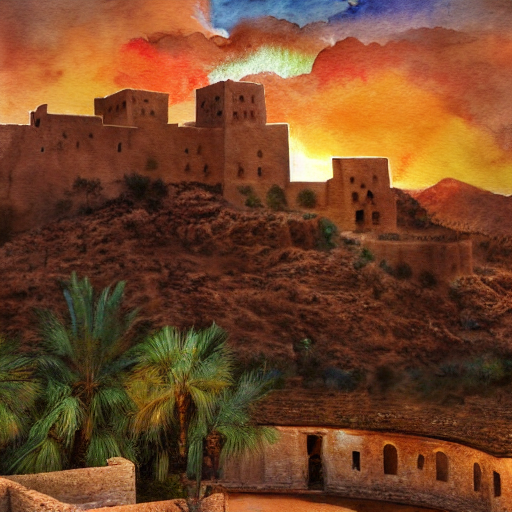

In [ ]:
# Generate image

# Write your descriptive prompt
prompt = "An ancient Omani castle on a hill, surrounded by desert and palm trees, traditional Middle Eastern architecture with high walls and watchtowers, dramatic sky at sunset, painted in watercolor style, soft brush strokes, warm earthy tones, fine art, 4K"

# Fetch and save your image
image = pipe(prompt).images[0]
image.save("generated_image.png")

# Display your image
image

## 1- üèÜ AI Manga Generation Challenge

### üéØ Objective  
Create a **short manga-style story** (3‚Äì5 panels) using **small LLMs** and **lightweight diffusion models**, all runnable on limited resources (like Google Colab with a T4 GPU).

---

### üß∞ Tools You Can Use

#### üß† Text Generation (LLMs)
Use compact instruction-tuned models from Hugging Face:
- `tiiuae/falcon-rw-1b`
- `google/flan-t5-base`
- `mistralai/Mistral-7B-Instruct` *(optional ‚Äì heavier)*
- `philschmid/bart-large-cnn-samsum` *(for dialogues)*
- Use `transformers.pipeline("text-generation")` for simplicity.

#### üé® Image Generation (Diffusion Models)
Choose small or optimized diffusion pipelines:
- `stabilityai/sd-turbo` *(fastest and most memory-efficient)*
- `CompVis/stable-diffusion-v1-4`
- `Linaqruf/anything-v3.0` *(great for anime/manga style)*

---

### üö¶ Challenge Instructions

#### 1. üìñ Generate the Story
Use your selected LLM to write a **very short manga story**.  
Each story should include:
- Characters
- Setting
- Dialogue
- Emotional tone

üìå *Example prompt:*  
Write a short 3-scene manga story. Each scene should describe the setting, what the characters are doing, and their dialogue.


---

#### 2. üñº Break It Into Panels
Convert your story into **3‚Äì5 panel descriptions**, where each panel includes:
- Visual composition
- Emotion or action
- Optional: dialogue

Keep each prompt under **77 tokens** to avoid CLIP truncation!

---

#### 3. ‚úèÔ∏è Engineer Your Image Prompts
For each panel, write a strong image prompt.

üìå *Example prompt:*  
a teenage boy running in the rain, crying, dramatic lighting, manga style, black and white, emotional expression, cinematic panel

---

‚úÖ Good prompt tips:
- Add scene + emotion + art style
- Keep total length short (under 77 tokens)
- Avoid full dialogue in the prompt ‚Äî too long

---

#### 4. üé® Generate Images
Use the `diffusers` library to render each panel:
- Load your chosen model (`sd-turbo` recommended)
- Feed your engineered prompt
- Save the output image (PNG or JPEG)

---

#### 5. üí¨ Add Dialogue (Optional)
Use `PIL.ImageDraw`, `matplotlib`, or any image annotation tool to:
- Add speech bubbles
- Add narration or captions

---

### üìÅ What To Submit
- Jupyter/Colab Notebook (.ipynb)
- Generated panel images (3‚Äì5)
- The story + prompts used
- All code cells showing text and image generation

---

### üí° Bonus Ideas
- Use an LLM to generate both story AND panel prompts automatically
- Maintain visual consistency (e.g., same character descriptions per panel)
- Add one panel twist ending!

---

---
## 2- üè• AI Marketing Agent Challenge

### üéØ Objective  
Build a **mini AI marketing assistant** for a local clinic. The agent should be able to generate **Instagram post ideas**, including both a **catchy caption** and an **image prompt**. It should target **clinic-specific content** like wellness tips, health awareness, offers, or staff highlights ‚Äî and run fully on a **Colab notebook** using lightweight LLMs and diffusion models.

---

### üß∞ Tools You Can Use

#### üß† Text Generation (LLMs)  
Choose small and efficient models from Hugging Face:
- `google/flan-t5-base`
- `tiiuae/falcon-rw-1b`
- `Writer/palmyra-base` *(great for marketing tone)*
- `OpenAssistant/oasst-sft-1-pythia-12b` *(optional ‚Äì heavier)*  
Use `transformers.pipeline("text2text-generation")` or `.generate()` method for more control.

#### üé® Image Generation (Diffusion Models)  
For visuals that match your captions:
- `stabilityai/sd-turbo` *(fast and ideal for Colab)*
- `CompVis/stable-diffusion-v1-4`
- `nitrosocke/clinic-diffusion` *(if available)*

---

### üö¶ Challenge Instructions

#### 1. üßæ Brainstorm Post Ideas  
Use your LLM to generate **5 Instagram post ideas** relevant to a local clinic.

Each post idea should include:
- A **theme** (e.g., skin care, vaccination, dental checkups)
- A **caption** (under 200 characters)
- An **image prompt** that visually supports the caption

üìå *Example prompt:*  
`Create 5 Instagram posts for a dermatology clinic. For each, give a short caption and a visual description for image generation.`

---

#### 2. ‚úèÔ∏è Write Image Prompts  
Refine each image description into a proper **Stable Diffusion prompt**.

‚úÖ Prompt tips:
- Include setting, subject, action, and style  
- Add terms like *"minimalist clinic scene, soft lighting, modern aesthetic, professional doctor in white coat"*

---

#### 3. üé® Generate Visuals  
Use `diffusers` to render one image per post:
- Load your selected model
- Use `.to("cuda")` if GPU is available
- Render and save images in a `posts/` folder

---

#### 4. üí° Overlay Captions (Optional)  
Use `PIL` or `matplotlib` to overlay captions below each image ‚Äî Instagram-style.

üõ† Example:
```python
from PIL import ImageDraw

draw = ImageDraw.Draw(image)
draw.text((10, image.height - 40), caption_text, font=font, fill="black")
```
üí° Bonus Ideas
Include emojis and hashtags in your captions

Try a ‚Äútheme week‚Äù (e.g., heart health awareness series)

Use the LLM to create a calendar of post ideas over a month

---
Make it creative but informative ‚Äî and imagine it‚Äôs helping a real clinic boost its presence! üåü
